# Installing and importing required libraries

In [1]:
%pip install germansentiment
%pip install pdfminer.six
%pip install PyPDF2
%pip install pandas
%pip install spacy
%pip install nltk
%pip install ipywidgets
%pip install scikit-learn
%pip install matplotlib
!python -m spacy download de_core_news_sm
%pip install spacy-sentiws
%pip install scipy==1.12
%pip install gensim

  Using cached germansentiment-1.1.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached regex-2024.4.16-cp311-cp311-macosx_10_9_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.19.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.3-cp311-cp311-macosx_10_12_x86_64.whl.metadata (3.8 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (

In [2]:
import pandas as pd
import nltk
import re
import numpy as np
import os



In [3]:
# Problems might be solved by installing certificate 
# replace version to your version
#sh "/Applications/Python 3.11/Install Certificates.command
#
#nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Processing of PDF files 
### Select one of the two options
### for testing use less data

In [4]:
from helper.pdf_news_reader import PdfNewsReader

# Test Directory: ShortNewsArtikel
df = PdfNewsReader.process_all_newspaper_articles('ShortNewsArtikel',parts=[1])
# Directory: NewsArtikel
#df = PdfNewsReader.process_all_newspaper_articles('NewsArtikel')

Reading next file: ShortNewsArtikel/2012_ZEIT_1.PDF
Reading next file: ShortNewsArtikel/2012_SPO_1.PDF
Reading next file: ShortNewsArtikel/2012_TAZ_1.PDF
Reading next file: ShortNewsArtikel/2012_WELT_1.PDF
Reading next file: ShortNewsArtikel/2015_ZEIT_1.PDF
Reading next file: ShortNewsArtikel/2015_SPO_1.PDF
Reading next file: ShortNewsArtikel/2015_TAZ_1.PDF
Reading next file: ShortNewsArtikel/2015_WELT_1.PDF
Reading next file: ShortNewsArtikel/2023_ZEIT_1.PDF
Reading next file: ShortNewsArtikel/2023_SPO_1.PDF
Reading next file: ShortNewsArtikel/2023_TAZ_1.PDF
Reading next file: ShortNewsArtikel/2023_WELT_1.PDF


In [5]:
# testing just a part df=df[0:10] of the bulk
#df_backup=df.copy()
#df=df[0:10]
df

,Extracted Text,Publication Date,Load Date,Words,Newspaper,Part,Year,MigText
0,Flüchtlinge aus Libyen auf Lampedusa\n © Tu...,2013-10-11,"October 11, 2013",992,ZEIT,2012_ZEIT_1,2013,Flüchtlinge aus Libyen auf Lampedusa\n © Tu...
1,Flüchtlingskinder in Athen warten auf die Esse...,2012-12-20,"December 23, 2012",384,ZEIT,2012_ZEIT_1,2012,Flüchtlingskinder in Athen warten auf die Esse...
2,Hamburg - Monatelang erleiden Flüchtlinge aus ...,2012-12-20,"December 20, 2012",818,SPO,2012_SPO_1,2012,Hamburg - Monatelang erleiden Flüchtlinge aus ...
3,Stockholm - Schweden will allen Asylanträgen v...,2013-09-04,"September 18, 2013",266,SPO,2012_SPO_1,2013,Stockholm - Schweden will allen Asylanträgen v...
4,Berlin - Im Oktober ist die Zahl der Asylbewer...,2012-10-12,"October 12, 2012",434,SPO,2012_SPO_1,2012,Berlin - Im Oktober ist die Zahl der Asylbewer...
5,"Hamburg - Sie wissen, dass ihnen der Tod droht...",2013-10-09,"October 9, 2013",2676,SPO,2012_SPO_1,2013,Sind vor einigen Jahren noch Migranten auf der...
6,BERLIN taz | Mit einem Festakt hat das Bundesa...,2013-04-11,"April 10, 2013",387,TAZ,2012_TAZ_1,2013,BERLIN taz | Mit einem Festakt hat das Bundesa...
7,Hochoffizielle Gäste der Europäischen Union au...,2013-01-21,"January 20, 2013",501,TAZ,2012_TAZ_1,2013,Hochoffizielle Gäste der Europäischen Union au...
8,VON DANIEL BAX\nBERLIN | taz Rund ein halbes J...,2013-12-13,"December 12, 2013",702,TAZ,2012_TAZ_1,2013,VON DANIEL BAX\nBERLIN | taz Rund ein halbes J...
9,AUS SYDNEY SVEN HANSEN\n Ich bin seit drei Jah...,2013-01-04,"January 3, 2013",1406,TAZ,2012_TAZ_1,2013,Hier sind in einem \nIndustriegebiet hinter ho...


# Sentiment Analysis using BERT-Model 


In [6]:
from helper.sentiment_bert import SentimentBert

#run in two cells when trying to use keyboard interrupts
SentimentBert.calculate_sentiment(df,text_column='Extracted Text',result_column='Sentiment',index_file_name='last_index.txt',tmp_file_name='df_korpus_tmp_1.csv',modulus=100,sleeptime_in_sec=20)


df['Sentiment_Score'] = df['Sentiment'].apply(SentimentBert.sentiment_to_score)

Starting at index 13.
Finished, clean up
Starting at index 0.
Interrupted by user. Progress saved up to index 44.


TypeError: 'float' object is not subscriptable

# Sentiment Analysis using SentiWS

In [7]:
from helper.sentiws_metric import SentiWS_Metric
#init the SentiWs calculator functtion
sentiws_m = SentiWS_Metric.getInstance()
analyze = sentiws_m.analyze_sentiment_ws_text

# calculate the polarity (term-count) and clearly polarity (weighted term count)
df[['pos_count','neg_count','pos_value','neg_value']]=(df.apply(lambda x: analyze(x['Extracted Text']),axis=1,result_type='expand'))
#calculate the missing values
df['polarity']=df.apply(lambda x: x["pos_count"]- x["neg_count"], axis=1)
df['clearly-Polarity']=df.apply(lambda x: x["pos_value"]+ x["neg_value"], axis=1)

In [8]:
df


,Extracted Text,Publication Date,Load Date,Words,Newspaper,Part,Year,MigText,Sentiment,Sentiment_MigText,pos_count,neg_count,pos_value,neg_value,polarity,clearly-Polarity
0,Flüchtlinge aus Libyen auf Lampedusa\n © Tu...,2013-10-11,"October 11, 2013",992,ZEIT,2012_ZEIT_1,2013,Flüchtlinge aus Libyen auf Lampedusa\n © Tu...,NaN,"[{'label': 'neutral', 'score': 0.5374473929405...",43.0,15.0,1.6679,-1.8765,28.0,-0.2086
1,Flüchtlingskinder in Athen warten auf die Esse...,2012-12-20,"December 23, 2012",384,ZEIT,2012_ZEIT_1,2012,Flüchtlingskinder in Athen warten auf die Esse...,NaN,"[{'label': 'negative', 'score': 0.636741578578...",19.0,20.0,1.7297,-4.5013,-1.0,-2.7716
2,Hamburg - Monatelang erleiden Flüchtlinge aus ...,2012-12-20,"December 20, 2012",818,SPO,2012_SPO_1,2012,Hamburg - Monatelang erleiden Flüchtlinge aus ...,NaN,"[{'label': 'negative', 'score': 0.828476488590...",30.0,30.0,2.5111,-6.1744,0.0,-3.6633
3,Stockholm - Schweden will allen Asylanträgen v...,2013-09-04,"September 18, 2013",266,SPO,2012_SPO_1,2013,Stockholm - Schweden will allen Asylanträgen v...,NaN,"[{'label': 'neutral', 'score': 0.4537985622882...",5.0,7.0,0.9735,-0.8719,-2.0,0.1016
4,Berlin - Im Oktober ist die Zahl der Asylbewer...,2012-10-12,"October 12, 2012",434,SPO,2012_SPO_1,2012,Berlin - Im Oktober ist die Zahl der Asylbewer...,NaN,"[{'label': 'neutral', 'score': 0.4906415343284...",8.0,3.0,0.3974,-0.6554,5.0,-0.2580
5,"Hamburg - Sie wissen, dass ihnen der Tod droht...",2013-10-09,"October 9, 2013",2676,SPO,2012_SPO_1,2013,Sind vor einigen Jahren noch Migranten auf der...,NaN,"[{'label': 'negative', 'score': 0.749614357948...",46.0,69.0,4.1257,-15.8964,-23.0,-11.7707
6,BERLIN taz | Mit einem Festakt hat das Bundesa...,2013-04-11,"April 10, 2013",387,TAZ,2012_TAZ_1,2013,BERLIN taz | Mit einem Festakt hat das Bundesa...,NaN,"[{'label': 'neutral', 'score': 0.7197948098182...",15.0,9.0,0.8440,-1.1215,6.0,-0.2775
7,Hochoffizielle Gäste der Europäischen Union au...,2013-01-21,"January 20, 2013",501,TAZ,2012_TAZ_1,2013,Hochoffizielle Gäste der Europäischen Union au...,NaN,"[{'label': 'neutral', 'score': 0.5569572448730...",7.0,12.0,0.7340,-2.8098,-5.0,-2.0758
8,VON DANIEL BAX\nBERLIN | taz Rund ein halbes J...,2013-12-13,"December 12, 2013",702,TAZ,2012_TAZ_1,2013,VON DANIEL BAX\nBERLIN | taz Rund ein halbes J...,NaN,"[{'label': 'neutral', 'score': 0.5476104021072...",18.0,20.0,1.1663,-4.0679,-2.0,-2.9016
9,AUS SYDNEY SVEN HANSEN\n Ich bin seit drei Jah...,2013-01-04,"January 3, 2013",1406,TAZ,2012_TAZ_1,2013,Hier sind in einem \nIndustriegebiet hinter ho...,NaN,"[{'label': 'negative', 'score': 0.584426403045...",37.0,38.0,1.6176,-3.8113,-1.0,-2.1937


# Read stored data (some things might take a while)

In [1]:
from helper.file_helper import read_file

df=read_file('korpus_calculated.csv',show_info=False)


# TF-IDF

In [3]:
from helper.tfidf_helper import top_tfidf_terms
# Beispielaufruf für die Funktion
show_amount=20
print(top_tfidf_terms(df,'ALL', [2012],show_amount))
print(top_tfidf_terms(df,'ALL', [2013],show_amount))
print(top_tfidf_terms(df,'ALL', [2015],show_amount))
print(top_tfidf_terms(df,'ALL', [2016],show_amount))
print(top_tfidf_terms(df,'ALL', [2023],show_amount))
print(top_tfidf_terms(df,'TAZ', 'ALL',show_amount))
print(top_tfidf_terms(df,'ZEIT', 'ALL',show_amount))
print(top_tfidf_terms(df,'SPO', 'ALL',show_amount))
print(top_tfidf_terms(df,'WELT', 'ALL',show_amount))

[('deutschland', 0.11034171701353326), ('prozent', 0.10649203885677343), ('mehr', 0.09957394563086877), ('flüchtlinge', 0.09816537746886103), ('migranten', 0.0878977974641819), ('menschen', 0.08660161674169545), ('kinder', 0.08208184822702708), ('berlin', 0.08194853526903847), ('jahren', 0.07415670297704215), ('wurde', 0.07396140635921117), ('syrien', 0.07285665918984272), ('euro', 0.07196294623766147), ('migrationshintergrund', 0.07127514829000918), ('immer', 0.07085759855619488), ('leben', 0.067544716233232), ('zwei', 0.0663637078547228), ('schon', 0.0653810413896513), ('gibt', 0.06415859387005825), ('deutschen', 0.0639188347040597), ('wurden', 0.06332184690854735)]
[('snowden', 0.1777172325911262), ('flüchtlinge', 0.16060140464303516), ('deutschland', 0.13171138875939895), ('mehr', 0.1000940584124899), ('menschen', 0.09869038361196773), ('eu', 0.08713031715912735), ('lampedusa', 0.07650407081951867), ('berlin', 0.07629037399422949), ('wurde', 0.07234946055225124), ('usa', 0.07131746

# Word2Vec

In [11]:
from  helper.word2vec_helper import find_similar_words

simAll = find_similar_words(df,'ALL', 'ALL', 'flüchtling')

In [12]:
simAll 

[('asylsuchender', 0.7642415165901184),
 ('geflüchtet', 0.7542745471000671),
 ('geflüchteter', 0.7125607132911682),
 ('schutzsuchend', 0.7041026949882507),
 ('asylbewerber', 0.597354531288147),
 ('ankommende', 0.5964897274971008),
 ('geflüchteten', 0.5861789584159851),
 ('neuankömmlinge', 0.579035758972168),
 ('mensch', 0.5548807978630066),
 ('geflüchtete', 0.5476894378662109)]

In [12]:
simTaz = find_similar_words(df,'TAZ', 'ALL', 'flüchtling')
simWelt = find_similar_words(df,'WELT', 'ALL', 'flüchtling')
simSpo = find_similar_words(df,'SPO', 'ALL', 'flüchtling')
simZeit = find_similar_words(df,'ZEIT', 'ALL', 'flüchtling')
simAll = find_similar_words(df,'ALL', 'ALL', 'flüchtling')

In [13]:
sim2012m = find_similar_words(df,'ALL', [2012], 'migration')
sim2013m = find_similar_words(df,'ALL', [2013], 'migration')
sim2015m = find_similar_words(df,'ALL', [2015], 'migration')
sim2016m = find_similar_words(df,'ALL', [2016], 'migration')
sim2023m = find_similar_words(df,'ALL', [2023], 'migration')

In [14]:
simTazm = find_similar_words(df,'TAZ', 'ALL', 'migration')
simWeltm = find_similar_words(df,'WELT', 'ALL', 'migration')
simSpom = find_similar_words(df,'SPO', 'ALL', 'migration')
simZeitm = find_similar_words(df,'ZEIT', 'ALL', 'migration')
simAllm = find_similar_words(df,'ALL', 'ALL', 'migration')

In [15]:
simWelt

[('deutschland', 0.9714027047157288),
 ('migrant', 0.9655548334121704),
 ('schweden', 0.9616722464561462),
 ('prozent', 0.9580732583999634),
 ('asylbewerber', 0.9569134712219238),
 ('land', 0.9532488584518433),
 ('asylantrag', 0.9532486796379089),
 ('migration', 0.9531951546669006),
 ('italien', 0.9520761370658875),
 ('zahl', 0.9519627094268799)]

# Visialization of SA results

In [2]:
from helper.visual_helper import average_score

column = 'Sentiment_Score'
np1 = 'TAZ'
np2 = 'WELT'
np3 = 'ZEIT'
np4 = "SPO"
average_score(df,[2012], 'ALL', column)
average_score(df,[2013], 'ALL', column)
average_score(df,[2015], 'ALL', column)
average_score(df,[2016], 'ALL', column)
average_score(df,[2023], 'ALL', column)
average_score(df,'ALL', np1, column)
average_score(df,'ALL', np2, column)
average_score(df,'ALL', np3, column)
average_score(df,'ALL', np4, column)


#average_score('ALL', 'ALL', 'SentiWS_MigText')
#average_score('ALL', 'ALL', 'SentiWS')


The average Sentiment_Score score for all newspapers in the year(s) 2012 is: -0.31
The average Sentiment_Score score for all newspapers in the year(s) 2013 is: -0.30
The average Sentiment_Score score for all newspapers in the year(s) 2015 is: -0.34
The average Sentiment_Score score for all newspapers in the year(s) 2016 is: -0.30
The average Sentiment_Score score for all newspapers in the year(s) 2023 is: -0.33
The average Sentiment_Score score for TAZ for all years is: -0.32
The average Sentiment_Score score for WELT for all years is: -0.29
The average Sentiment_Score score for ZEIT for all years is: -0.27
The average Sentiment_Score score for SPO for all years is: -0.39


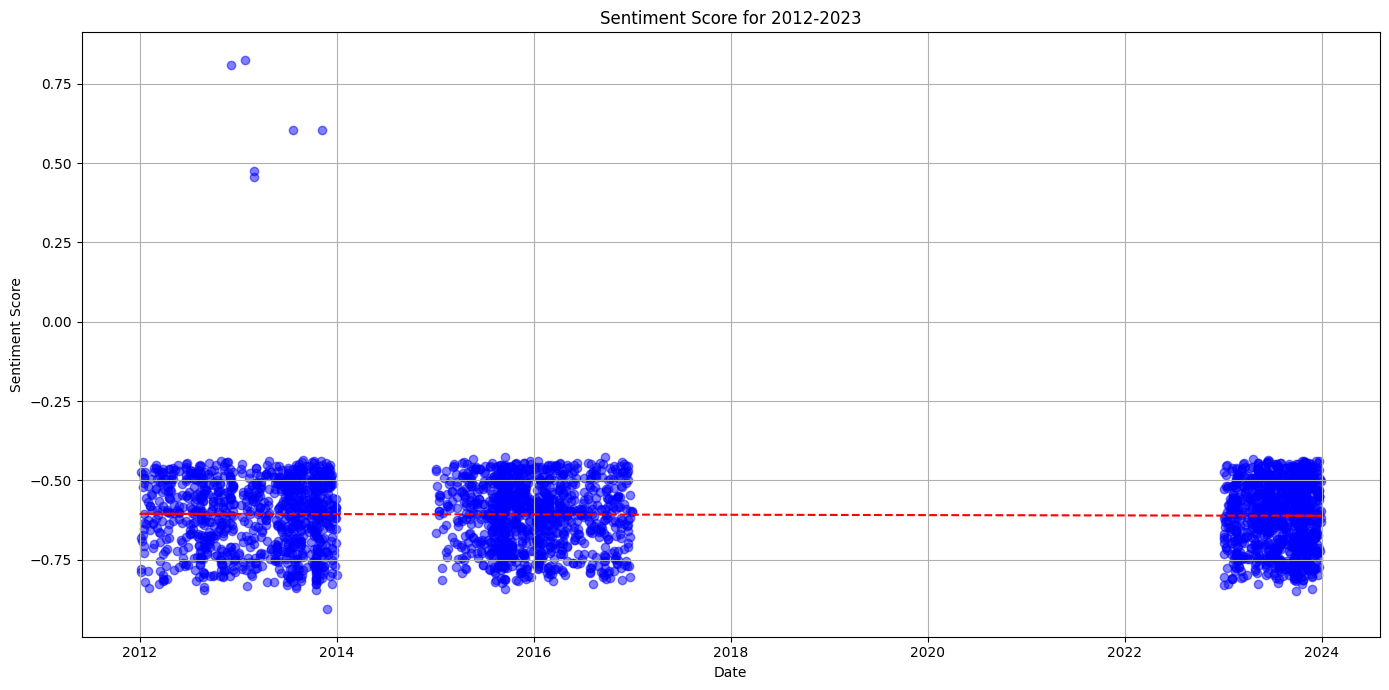

In [13]:
from helper.visual_helper import show_plt_year

column='Sentiment_Score'
#show_plt_year(df,2015,2016,column)
#show_plt_year(df,2012,2013,column)
#show_plt_year(2015,2016,column)
show_plt_year(df,2012,2023,column)

In [11]:
 df[(df['Year'] <= 2022) & (df['Year'] >= 2018)  ]

,Extracted Text,Publication Date,Load Date,Newspaper,MigText,Sentiment,Sentiment_MigText,SentiWS,SentiWS_MigText,Year,pos_count,neg_count,pos_value,neg_value,polarity,clearly-Polarity,Sentiment_Score,SentiScore_Migtext


In [16]:
lowest_index = df['Sentiment_Score'].idxmin()
# Finding the index of the second lowest sentiment score
second_lowest_index = df['Sentiment_Score'].nsmallest(3).index[-1]
# Extrahiere den Text aus der Spalte 'Extracted Text' basierend auf dem niedrigsten Index
print(   df.loc[lowest_index, 'Extracted Text'])
text_lowest_sentiWS = df.loc[second_lowest_index, 'Extracted Text']

# Gib den Text aus
print(text_lowest_sentiWS)

Nassau - Ein mit geschätzt 150 haitianischen Flüchtlingen vollkommen überladenes Segelboot ist vor den 
Bahamas gekentert und hat mindestens 30 Menschen in den Tod gerissen. Stundenlang hätten sich die 
Überlebenden an den Rand des 13 Meter langen Bootes geklammert, bis Hilfe kam, sagte ein Behördensprecher.    
    Die genaue Zahl der Toten sei derzeit nicht bekannt. Bestätigt sind 20 Opfer, laut Berichten von Flüchtlingen an 
Bord sollen es mindestens 30 sein. Militär und Polizei auf den Bahamas arbeiten eng mit der US-Küstenwache 
zusammen, um die Leichen zu bergen.    
    110 Menschen seien gerettet worden, sagte ein Regierungssprecher in Nassau dem "Miami Herald". Die 
Flüchtlinge sollen acht oder neun Tag auf See unterwegs gewesen sein - mit wenig Trinkwasser und Lebensmitteln, 
außerdem ohne Rettungswesten.    
    Viele Überlebende seien extrem dehydriert gewesen, als die Rettungsmannschaften sie fanden. "Das Boot war 
eindeutig völlig überladen, instabil und nicht seetüchtig"

In [19]:
second_lowest_index

5

In [18]:
# Filter the DataFrame for rows with a positive Sentiment_Score
positive_sentiment_df = df[df['Sentiment_Score'] > 0]
positive_sentiment_df

,Extracted Text,Publication Date,Load Date,Newspaper,MigText,Sentiment,Sentiment_MigText,SentiWS,SentiWS_MigText,Year,pos_count,neg_count,pos_value,neg_value,polarity,clearly-Polarity,Sentiment_Score,SentiScore_Migtext
145,DIE ZEIT: In einem halben Jahr wählt Deutsc...,2013-02-28,"February 28, 2013",ZEIT,Sie alle haben eine \nEinwanderungsgeschich...,"[{'label': 'positive', 'score': 0.457182109355...","[{'label': 'neutral', 'score': 0.6519112586975...",4.2725,0.5266,2013,61.0,13.0,7.6167,-2.7688,48.0,4.8479,0.457182,0.000000
166,Jeannette Otto \nDIE ZEIT: In einem halben ...,2013-02-28,"March 25, 2022",ZEIT,Sie alle haben eine \nEinwanderungsgeschichte ...,"[{'label': 'positive', 'score': 0.474679589271...","[{'label': 'neutral', 'score': 0.6039401292800...",4.2970,0.6478,2013,60.0,13.0,7.2560,-2.7688,47.0,4.4872,0.474680,0.000000
1186,LESERBRIEFE\nGröpelinger SPD bemüht sich erfol...,2013-07-22,"July 21, 2013",TAZ,"2013\nLiebe taz, Folgendes zum Beirat Gröpelin...","[{'label': 'positive', 'score': 0.604522049427...","[{'label': 'positive', 'score': 0.650134086608...",1.6814,1.0865,2013,4.0,0.0,0.1973,0.0000,4.0,0.1973,0.604522,0.650134
1363,"Es ist beeindruckend, zu sehen, wie das Selbst...",2013-01-24,"January 23, 2013",TAZ,"Es ist beeindruckend, zu sehen, wie das Selbst...","[{'label': 'positive', 'score': 0.826029181480...","[{'label': 'positive', 'score': 0.802825093269...",1.2970,1.2890,2013,17.0,1.0,2.1218,-0.0048,16.0,2.1170,0.826029,0.802825
1589,Die deutsche Fußballnationalmannschaft gilt al...,2012-12-04,"January 26, 2013",WELT,Die deutsche Fußballnationalmannschaft gilt al...,"[{'label': 'positive', 'score': 0.810629427433...","[{'label': 'positive', 'score': 0.941622614860...",-0.2771,0.2237,2012,13.0,3.0,2.4953,-1.4862,10.0,1.0091,0.810629,0.941623
1892,Berlin - Menschen mit Migrationshintergrund i...,2013-11-06,"November 8, 2013",WELT,Berlin - Menschen mit Migrationshintergrund i...,"[{'label': 'positive', 'score': 0.604996144771...","[{'label': 'positive', 'score': 0.919633388519...",0.5171,0.0040,2013,5.0,0.0,0.5934,0.0000,5.0,0.5934,0.604996,0.919633


In [21]:
positive_sentiment_df.iloc[3]['Extracted Text']

'Hamburg - Sie wissen, dass ihnen der Tod droht. Dennoch steigen viele Menschen an Afrikas Küsten in marode \nBoote, in der Hoffnung auf ein besseres Leben in Europa.    \n    Sind vor einigen Jahren noch Migranten auf der Suche nach Arbeit aus Nordafrika etwa nach Italien gekommen, \nsind es heute oft Menschen, die vor Chaos und Gewalt in ihren Heimatländern fliehen - Syrer, Afghanen, Somalier. \nDie Zahl der Asylanträge in Europa ist in den vergangenen sechs Jahren deutlich gestiegen.    \n    Zufluchtsuchende seien "besonders verletzliche Menschen", mahnte Bundespräsident Joachim Gauck, nachdem \nvor Lampedusa am Donnerstag Dutzende Menschen ertranken. "Leben zu schützen und Flüchtlingen Gehör zu \ngewähren, sind wesentliche Grundlagen unserer Rechts- und Werteordnung." Am Dienstag berieten die EU-\nInnenminister in Luxemburg über Konsequenzen aus dem Unglück mit rund 300 Toten. Doch sie konnten sich trotz \nheftiger Kritik zu keiner umfassenden Änderung ihrer Asylpolitik durchringe

In [19]:
df[df['Sentiment_Score'] == 0.0].shape[0]

2845

# Most used nouns

In [26]:
from helper.noun_counter import Noun_Counter

nc = Noun_Counter.getInstance()

nc.set_stopwords(set(nltk.corpus.stopwords.words('german')))
nc.add_custom_words({"load-date", "page"})
nc.set_nlp(SentiWS_Metric.getInstance().nlp)

df_2012_13 = df[(df['Year'] == 2012) | (df['Year'] == 2013)] 
df_2015_16 = df[(df['Year'] == 2015) | (df['Year'] == 2016)] 
df_2023 = df[(df['Year'] == 2023) ] 

most_common_nouns_2012_13 = nc.get_most_common_nouns(df_2012_13['Extracted Text'])
most_common_nouns_2015_16 = nc.get_most_common_nouns(df_2015_16['Extracted Text'])
most_common_nouns_2023 = nc.get_most_common_nouns(df_2023['Extracted Text'])

print("Meistgenutzte Substantive 2012/13:") 
print(most_common_nouns_2012_13)
print("\nMeistgenutzte Substantive 2015/16:") 
print(most_common_nouns_2015_16)
print("\nMeistgenutzte Substantive 2023:") 
print(most_common_nouns_2023)

Meistgenutzte Substantive 2012/13:
[('Flüchtling', 5064), ('Jahr', 3974), ('Mensch', 2981), ('Land', 2689), ('Kind', 1854), ('Migrant', 1671), ('Prozent', 1647), ('Tag', 1191), ('Mann', 1124), ('Frau', 1105), ('Asyl', 1064), ('Asylbewerber', 1061), ('Familie', 1034), ('Monat', 938), ('Schule', 897), ('Stadt', 888), ('Regierung', 876), ('Euro', 851), ('Zahl', 847), ('Leben', 843)]

Meistgenutzte Substantive 2015/16:
[('Flüchtling', 12496), ('Jahr', 4279), ('Land', 4229), ('Mensch', 4050), ('Migrant', 2826), ('Zahl', 2005), ('Asylbewerber', 1936), ('Grenze', 1905), ('Prozent', 1833), ('Migration', 1554), ('Staat', 1354), ('Monat', 1288), ('Asyl', 1241), ('Asylantrag', 1233), ('Regierung', 1212), ('Behörde', 1117), ('Tag', 1096), ('Woche', 1061), ('Million', 1046), ('Bundesamt', 995)]

Meistgenutzte Substantive 2023:
[('Mensch', 5429), ('Jahr', 4362), ('Land', 4230), ('Migrant', 2947), ('Migration', 2338), ('Flüchtling', 1969), ('Prozent', 1794), ('Regierung', 1584), ('Grenze', 1541), ('Z